In [1]:
import sys
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

PROJECT_ROOT = os.path.abspath(os.pardir)
sys.path.append(PROJECT_ROOT)

%matplotlib widget

In [2]:
bigLUT = np.load('data/egslut.npy')
d = np.load('data/egslutAxes.npz')
energies = d['arr_0']
stepsizeArray = d['arr_1']
densityArray = d['arr_2']
N = bigLUT[:, :, :, 2].size

In [3]:
# perform fit of LUT
poly = PolynomialFeatures(degree=10)
X = np.zeros(shape = (N, 3), dtype=float)
Y = np.log10(bigLUT[:, :, :, 2].reshape((N, )).reshape(-1, 1))
XX, YY, ZZ = np.meshgrid(energies, stepsizeArray, densityArray)
X[:, 0] = XX.reshape((N, ))
X[:, 1] = YY.reshape((N, ))
X[:, 2] = ZZ.reshape((N, ))

X_ = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X_, Y)

LinearRegression()

In [4]:
lr.coef_

array([[ 2.54599108e-03,  3.76641713e-02, -7.29865974e-03,
         1.90902115e-02,  7.17681732e-02, -3.32007497e-03,
         7.83932030e-02, -1.70636386e-04, -7.05293486e-04,
         2.41785589e-02, -8.70534646e-03, -1.88018296e-02,
         1.15375736e-01, -1.79943737e-04, -3.10943647e-03,
         8.01277150e-02, -8.91469341e-06, -8.87429874e-05,
        -1.00721735e-03,  2.37663635e-02, -3.52544605e-03,
        -6.14414762e-02, -3.67769422e-02,  1.63099115e-05,
        -2.44208759e-02,  9.23271651e-02, -5.90902931e-06,
        -3.60798340e-04, -4.38089408e-03,  6.93992466e-02,
         1.09432555e-06, -6.11428796e-06, -1.34347592e-04,
        -1.91771300e-03,  1.98789589e-02,  8.41803159e-04,
        -8.20872199e-04,  6.15952920e-03,  1.02503254e-02,
        -8.53806961e-02, -5.21226900e-02,  1.11792126e-04,
        -2.02377978e-03, -2.71668103e-02,  4.56963293e-02,
         2.22157783e-07, -3.29630866e-05, -5.43043618e-04,
        -6.06101514e-03,  4.89545611e-02, -5.70157950e-0

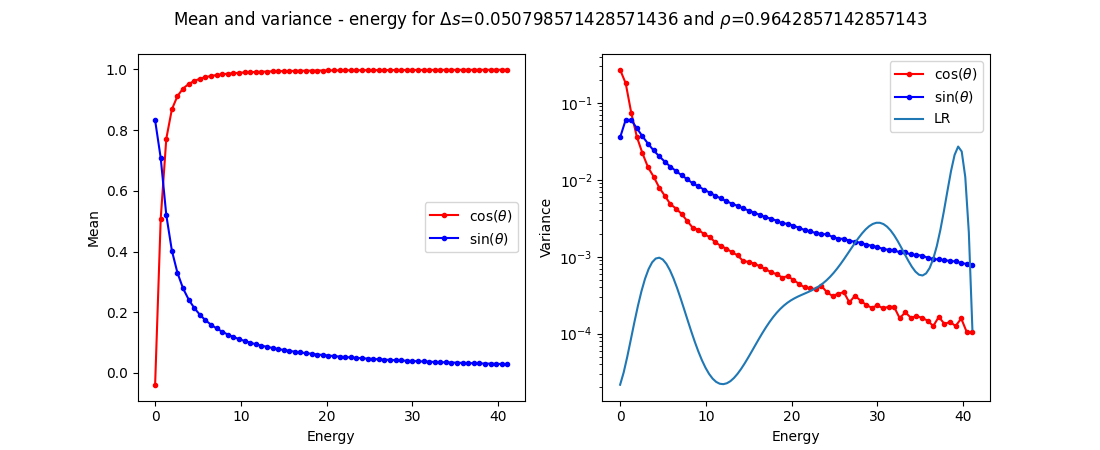

In [10]:
# Plot variance for fixed stepsize and density
stepsizeIndex = stepsizeArray.size//2
densityIndex = densityArray.size//2

# Linear model
energyLinspace = np.linspace(energies.min(), energies.max(), 100)
Xtemp = np.zeros(shape=(energyLinspace.size, 3), dtype=float)
Xtemp[:, 0] = energyLinspace
Xtemp[:, 1] = stepsizeArray[stepsizeIndex]
Xtemp[:, 2] = densityArray[densityIndex]
lrVar = lr.predict(poly.fit_transform(Xtemp))

# Data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
fig.suptitle(f'Mean and variance - energy for $\Delta s$={stepsizeArray[stepsizeIndex]} and $\\rho$={densityArray[densityIndex]}')

ax1.plot(energies, bigLUT[:, stepsizeIndex, densityIndex, 0], '.-r', label=f'$\cos(\\theta)$')
ax1.plot(energies, bigLUT[:, stepsizeIndex, densityIndex, 1], '.-b', label=f'$\sin(\\theta)$')
ax1.set_ylabel('Mean')
ax1.set_xlabel('Energy')
ax1.legend()

ax2.semilogy(energies, bigLUT[:, stepsizeIndex, densityIndex, 2], '.-r', label=f'$\cos(\\theta)$')
ax2.semilogy(energies, bigLUT[:, stepsizeIndex, densityIndex, 3], '.-b', label=f'$\sin(\\theta)$')
ax2.semilogy(energyLinspace, np.power(10, lrVar), label='LR')
ax2.set_ylabel('Variance')
ax2.set_xlabel('Energy')
ax2.legend()


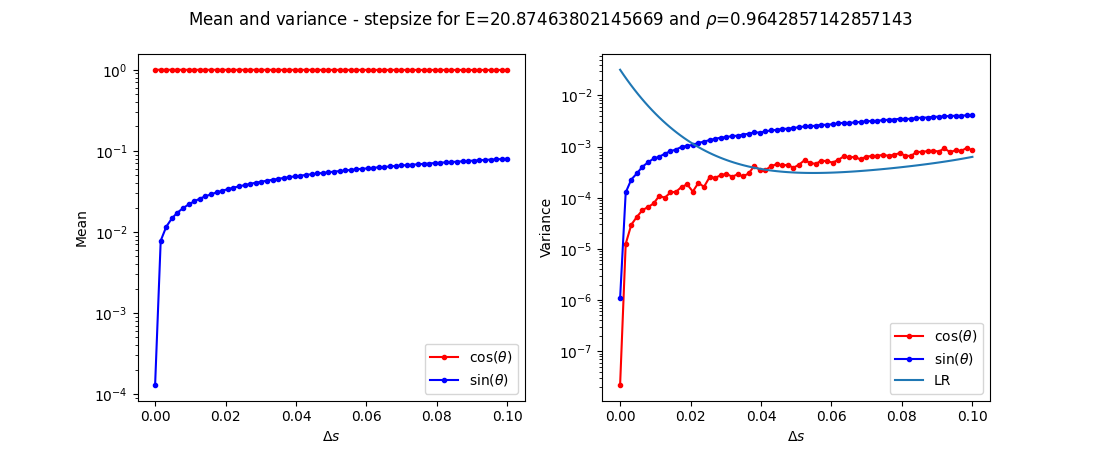

In [6]:
energyIndex = energies.size//2
densityIndex = densityArray.size//2


# Linear model
dsLinspace = np.linspace(stepsizeArray.min(), stepsizeArray.max(), 100)
Xtemp = np.zeros(shape=(dsLinspace.size, 3), dtype=float)
Xtemp[:, 0] = energies[energyIndex]
Xtemp[:, 1] = dsLinspace
Xtemp[:, 2] = densityArray[densityIndex]
lrVar = lr.predict(poly.fit_transform(Xtemp))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
fig.suptitle(f'Mean and variance - stepsize for E={energies[energyIndex]} and $\\rho$={densityArray[densityIndex]}')

ax1.semilogy(stepsizeArray, bigLUT[energyIndex, :, densityIndex, 0], '.-r', label=f'$\cos(\\theta)$')
ax1.semilogy(stepsizeArray, bigLUT[energyIndex, :, densityIndex, 1], '.-b', label=f'$\sin(\\theta)$')
ax1.set_ylabel('Mean')
ax1.set_xlabel('$\Delta s$')
ax1.legend()

ax2.semilogy(stepsizeArray, bigLUT[energyIndex, :, densityIndex, 2], '.-r', label=f'$\cos(\\theta)$')
ax2.semilogy(stepsizeArray, bigLUT[energyIndex, :, densityIndex, 3], '.-b', label=f'$\sin(\\theta)$')
ax2.semilogy(dsLinspace, np.power(10, lrVar), label='LR')
ax2.set_ylabel('Variance')
ax2.set_xlabel('$\Delta s$')
ax2.legend()


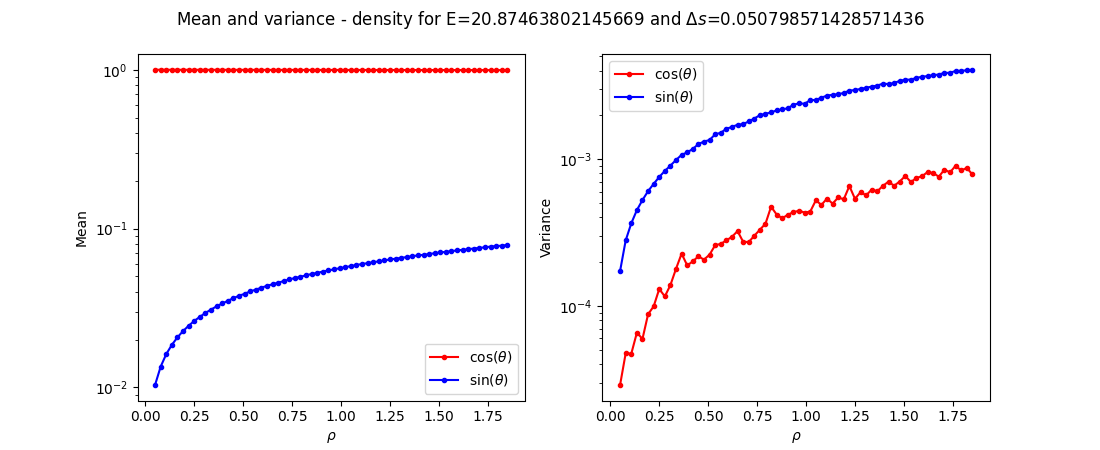

In [7]:
energyIndex = energies.size//2
stepsizeIndex = stepsizeArray.size//2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
fig.suptitle(f'Mean and variance - density for E={energies[energyIndex]} and $\\Delta s$={stepsizeArray[stepsizeIndex]}')

ax1.semilogy(densityArray, bigLUT[energyIndex, stepsizeIndex, :, 0], '.-r', label=f'$\cos(\\theta)$')
ax1.semilogy(densityArray, bigLUT[energyIndex, stepsizeIndex, :, 1], '.-b', label=f'$\sin(\\theta)$')
ax1.set_ylabel('Mean')
ax1.set_xlabel('$\\rho$')
ax1.legend()

ax2.semilogy(densityArray, bigLUT[energyIndex, stepsizeIndex, :, 2], '.-r', label=f'$\cos(\\theta)$')
ax2.semilogy(densityArray, bigLUT[energyIndex, stepsizeIndex, :, 3], '.-b', label=f'$\sin(\\theta)$')
ax2.set_ylabel('Variance')
ax2.set_xlabel('$\\rho$')
ax2.legend()


In [8]:
from electronTransportCode.ParticleModel import SimplifiedEGSnrcElectron
from electronTransportCode.Material import WaterMaterial


In [9]:
# No zero elements LUT!
energy = 0.036579699130547066
stepsize = 0.0006712792226017431

particle = SimplifiedEGSnrcElectron(4, '3d')
np.where(particle.varLUT == 0.0)[0]

AttributeError: 'SimplifiedEGSnrcElectron' object has no attribute 'varLUT'